In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
stud = pd.read_csv("stud_math.csv")

Предобработка:

In [130]:
# Заполнение пропусков
def nan_fill(col, val):
    stud[col].apply(lambda x: val if pd.isnull(x) else x)

    
# Анализ выбранного атрибута    
def col_info(df, col):
    if df[col].dtypes == 'object':
        all_indexes = list(df[col].value_counts().index)
        print(df[col].value_counts())
        print('Уникальных значений:', df[col].nunique())
        print('Пропущеных значений в столбце:',
              df[col].isnull().sum(axis=0))
        sns.countplot(df[col])
    else:
        fig, ax = plt.subplots()
        df[col].hist(ax=ax)
        df[col].describe()
        ax.set_xlabel(col)
        plt.show
        print('Мода: ', df[col].mode())
        print('Медиана: ', df[col].median())
        print('Среднее', df[col].mean())
        print('Пропущеных значений в столбце:',
              df[col].isnull().sum(axis=0))

# Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
# Тест Стьюдента   
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# Первичный анализ данных:

In [131]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

В выборке представлено 395 учеников

### 1. Рассмотрим атрибут school:

GP    349
MS     46
Name: school, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


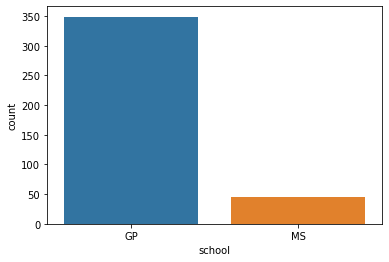

In [132]:
col_info(stud,'school')

Большая часть школьников учится в школе GP

### 2. Рассмотрим атрибут sex:

F    208
M    187
Name: sex, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


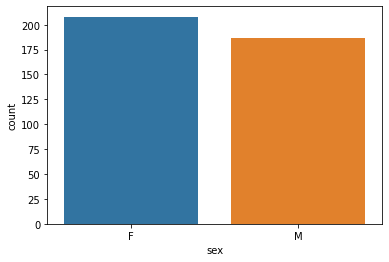

In [133]:
col_info(stud,'sex')

Выборка содержит, примерно, поровну мальчиков и девочек

### 3. Рассмотрим атрибут age:

Мода:  0    16
dtype: int64
Медиана:  17.0
Среднее 16.696202531645568
Пропущеных значений в столбце: 0


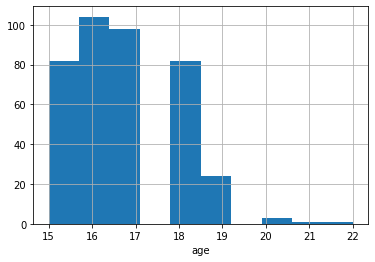

In [134]:
col_info(stud,'age')

Школьники, чей возраст > 19 - потенциальные выбросы

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


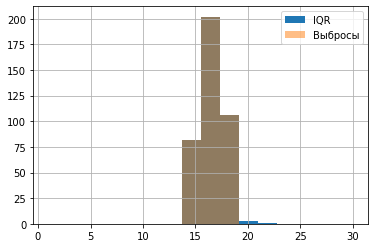

In [135]:
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
IQR = perc75 - perc25
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16,
                                                                        range = (1, 30), 
                                                                        label = 'IQR')
stud.age.loc[stud.age <= 19].hist(alpha = 0.5, bins = 16, range = (1, 30), label = 'Выбросы')
plt.legend()

Представленный график отображает выборку, попавшую в межквартильный размах, а так же выбросы

### 4. Рассмотрим атрибут address:

U    295
R     83
Name: address, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 17


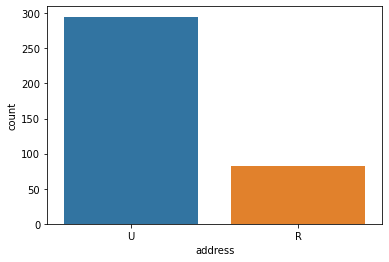

In [136]:
col_info(stud,'address')

Большая часть школьников живет в черте города. NaN можно заполнить модой.

U    312
R     83
Name: address, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


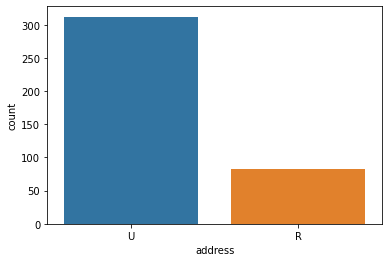

In [137]:
stud.address = stud.address.apply(lambda x: 'U' if pd.isnull(x) else x)
col_info(stud,'address')

Теперь в выборке отсутствуют пробелы

### 5. Рассмотрим атрибут Pstatus:

T    314
A     36
Name: Pstatus, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 45


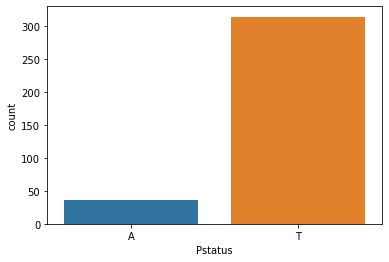

In [138]:
col_info(stud,'Pstatus')

В выборке значительная часть учеников имеет статус совместного жилья родителей = живут вместе. Пробелы так же могут быть заполнены этим значением.

T    359
A     36
Name: Pstatus, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


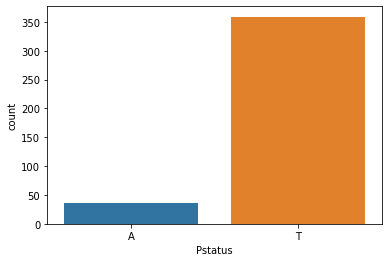

In [139]:
stud.Pstatus = stud.Pstatus.apply(lambda x: 'T' if pd.isnull(x) else x)
col_info(stud, 'Pstatus')

Теперь в выборке отсутствуют пробелы

### 6. Рассмотрим атрибут famsize:

GT3    261
LE3    107
Name: famsize, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 27


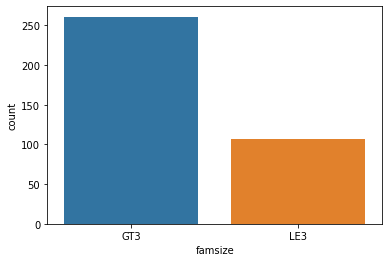

In [140]:
col_info(stud,'famsize')

Для заполнения пробелов, отсортируем записи с NaN и посмотрим у них признак Pstatus

T    24
A     3
Name: Pstatus, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


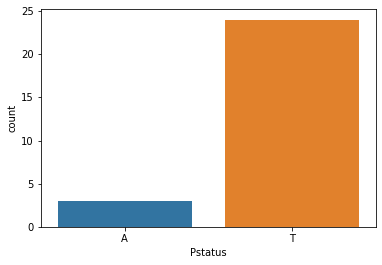

In [141]:
col_info(stud[pd.isnull(stud.famsize)], 'Pstatus')

Для всех пустых записей, где Pstatus == Т атрибут famsize = GT3, иначе famsize = LE3

In [142]:
stud.loc[(stud['famsize'].isnull())&(stud['Pstatus']=='T'), 'famsize'] = 'GT3'
stud.loc[(stud['famsize'].isnull())&(stud['Pstatus']=='A'), 'famsize'] = 'LE3'

GT3    285
LE3    110
Name: famsize, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


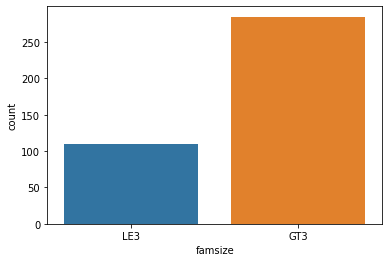

In [143]:
col_info(stud,'famsize')

Теперь в выборке отсутствуют пробелы.

### 7. Рассмотрим атрибут Medu:

Мода:  0    4.0
dtype: float64
Медиана:  3.0
Среднее 2.75
Пропущеных значений в столбце: 3


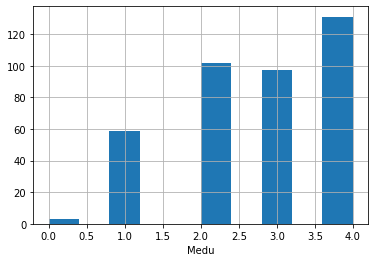

In [144]:
col_info(stud, 'Medu')

Сравним этот показатель с Fedu

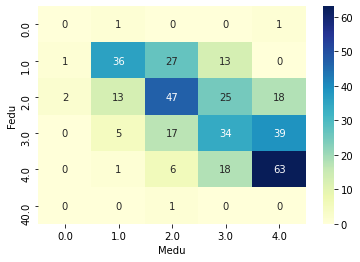

In [145]:
sns.heatmap(pd.crosstab(stud['Fedu'], stud['Medu']), annot = True, cmap = "YlGnBu")

Явно прослеживается корреляция между образованием отца и матери.

Мода:  0    1.0
1    2.0
2    3.0
dtype: float64
Медиана:  2.0
Среднее 2.0
Пропущеных значений в столбце: 0


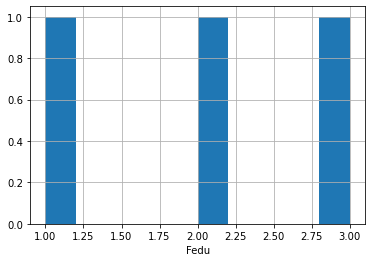

In [146]:
col_info(stud[pd.isnull(stud.Medu)], 'Fedu')

Для всех пустых значений Medu = Fedu

Мода:  0    4.0
dtype: float64
Медиана:  3.0
Среднее 2.7443037974683544
Пропущеных значений в столбце: 0


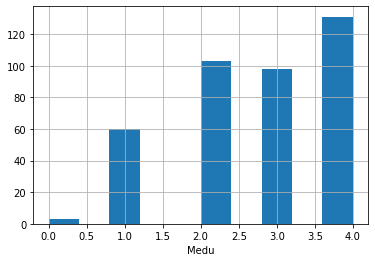

In [147]:
stud.loc[stud['Medu'].isnull(), 'Medu'] = stud.Fedu[stud.Medu.isnull()]
col_info(stud, 'Medu')

Теперь в выборке отсутствуют пробелы.

### 8. Рассмотрим атрибут Fedu:

Мода:  0    2.0
dtype: float64
Медиана:  2.0
Среднее 2.61455525606469
Пропущеных значений в столбце: 24


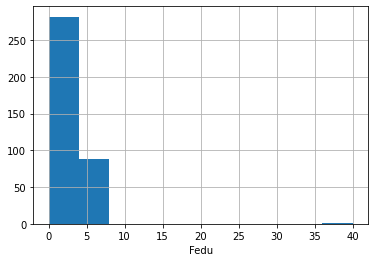

In [148]:
col_info(stud, 'Fedu')

В выборке присутствует ошибка, это значение 40. Возможно это неправильно записаное значение 4.0

Мода:  0    2.0
dtype: float64
Медиана:  2.0
Среднее 2.5175202156334233
Пропущеных значений в столбце: 24


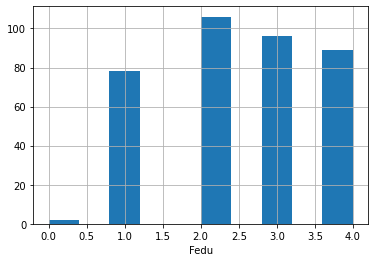

In [149]:
stud.loc[stud['Fedu']==40.0, 'Fedu'] = 4
col_info(stud, 'Fedu')

Как мы уже знаем, существует корреляция между Fedu и Medu. Таким образом мы закроем пробелы.

Мода:  0    2.0
dtype: float64
Медиана:  3.0
Среднее 2.5468354430379745
Пропущеных значений в столбце: 0


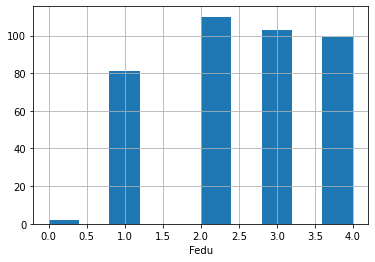

In [150]:
stud.loc[stud['Fedu'].isnull(), 'Fedu'] = stud.Medu[stud.Fedu.isnull()]
col_info(stud, 'Fedu')

### 9. Рассмотрим атрибут Mjob:

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 19


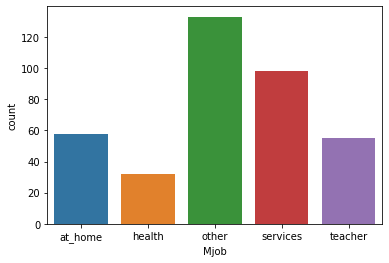

In [151]:
col_info(stud, 'Mjob')

Заполним пропуски случайно одним из двух частых значений.

other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 0


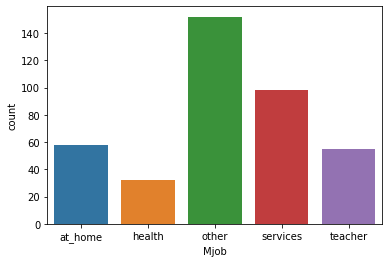

In [152]:
stud.loc[stud['Mjob'].isnull(), 'Mjob'] = random.choices(['other', 'services'], weights=[127, 98])
col_info(stud, 'Mjob')

### 10. Рассмотрим атрибут Fjob:

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 36


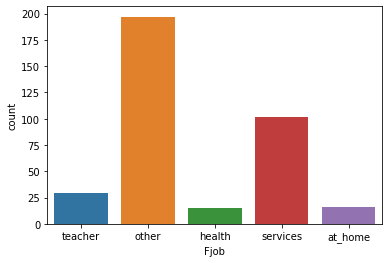

In [153]:
col_info(stud, 'Fjob')

other       197
services    138
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64
Уникальных значений: 5
Пропущеных значений в столбце: 0


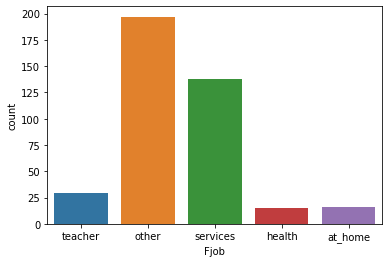

In [154]:
stud.loc[stud['Fjob'].isnull(), 'Fjob'] = random.choices(['other', 'services'], weights=[197, 102])
col_info(stud, 'Fjob')

### 11. Рассмотрим атрибут reason:

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64
Уникальных значений: 4
Пропущеных значений в столбце: 17


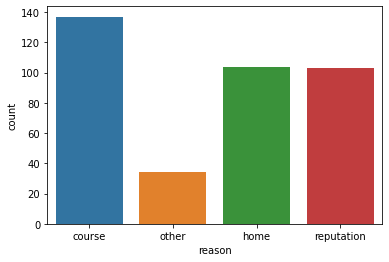

In [155]:
col_info(stud, 'reason')

Сравним это показатель в контексте продолжительности пути до школы

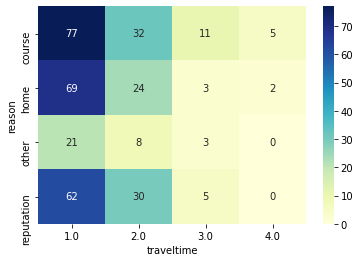

In [156]:
sns.heatmap(pd.crosstab(stud['reason'], stud['traveltime']), annot = True, cmap = "YlGnBu")

В выборке прослеживается корреляция между расстоянием до школы и причиной = близость к дому. Так же одни из самых важных признаков для учеников - образовательная программа и репутация. Логично заполнить пробелы случайно выбирая из этих причин.

course        137
reputation    120
home          104
other          34
Name: reason, dtype: int64
Уникальных значений: 4
Пропущеных значений в столбце: 0


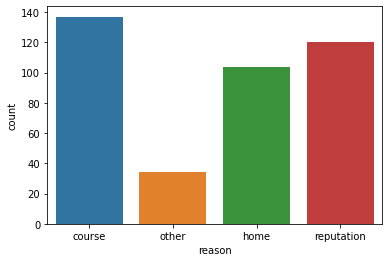

In [157]:
stud.loc[stud['reason'].isnull(), 'reason'] = random.choices(['course', 'home', 'reputation'], weights=[137, 104, 103])
col_info(stud, 'reason')

Теперь в выборке отсутствуют пробелы.

### 12. Рассмотрим атрибут guardian:

mother    250
father     86
other      28
Name: guardian, dtype: int64
Уникальных значений: 3
Пропущеных значений в столбце: 31


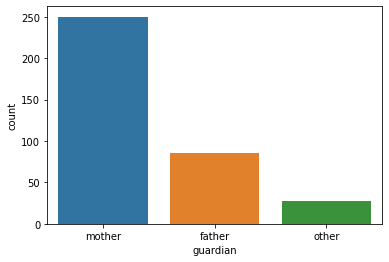

In [158]:
col_info(stud, 'guardian')

Наиболее встречающейся параметр = mother

mother    281
father     86
other      28
Name: guardian, dtype: int64
Уникальных значений: 3
Пропущеных значений в столбце: 0


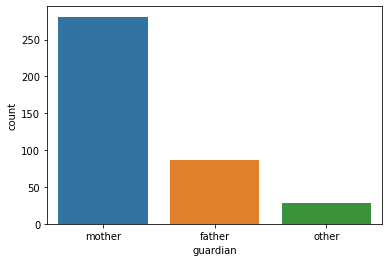

In [159]:
stud.loc[stud['guardian'].isnull(), 'guardian'] = 'mother'
col_info(stud, 'guardian')

Теперь в выборке отсутствуют пробелы.

### 13. Рассмотрим атрибут traveltime:

Мода:  0    1.0
dtype: float64
Медиана:  1.0
Среднее 1.438692098092643
Пропущеных значений в столбце: 28


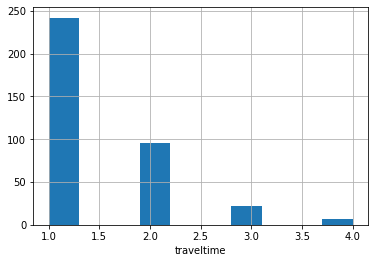

In [160]:
col_info(stud, 'traveltime')

Преобладающее значениие 1.0

Мода:  0    1.0
dtype: float64
Медиана:  1.0
Среднее 1.4075949367088607
Пропущеных значений в столбце: 0


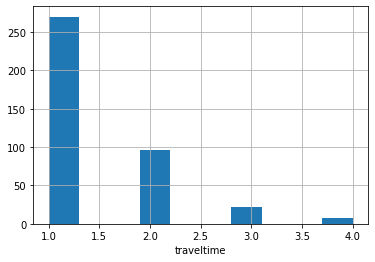

In [161]:
stud.loc[stud['traveltime'].isnull(), 'traveltime'] = 1.0
col_info(stud, 'traveltime')

Теперь в выборке отсутствуют пробелы.

### 14. Рассмотрим атрибут studytime:

Мода:  0    2.0
dtype: float64
Медиана:  2.0
Среднее 2.038659793814433
Пропущеных значений в столбце: 7


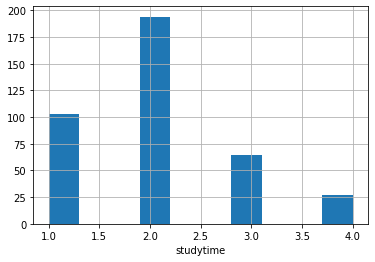

In [162]:
col_info(stud, 'studytime')

Рассмотрим как изменяется studytime в зависимости от sex

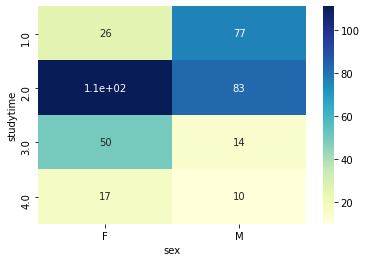

In [163]:
sns.heatmap(pd.crosstab(stud['studytime'], stud['sex']), annot = True, cmap = "YlGnBu")

Видно что для девочек преобладающим значением studytime является 2.0, в то время как для мальчиков значения распределены поровну между 1.0 и 2.0

In [164]:
stud.loc[(stud['studytime'].isnull())&(stud['sex']=='M'), 'studytime'] = random.choice([1.0, 2.0])
stud.loc[(stud['studytime'].isnull())&(stud['sex']=='F'), 'studytime'] = 2.0

Мода:  0    2.0
dtype: float64
Медиана:  2.0
Среднее 2.037974683544304
Пропущеных значений в столбце: 0


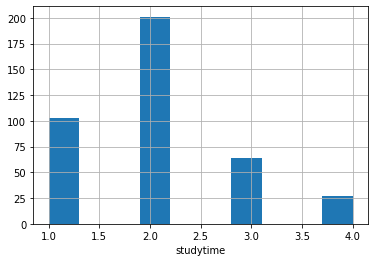

In [165]:
col_info(stud, 'studytime')

Теперь в выборке отсутствуют пробелы.

### 15. Рассмотрим атрибут failures:

Мода:  0    0.0
dtype: float64
Медиана:  0.0
Среднее 0.3378016085790885
Пропущеных значений в столбце: 22


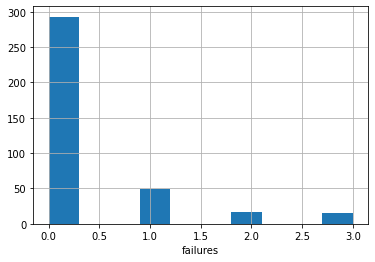

In [166]:
col_info(stud, 'failures')

Из графика видно что у подавляющего большинства отсутствуют внеучебные неудачи. Этим значением можно закрыть пробелы

In [167]:
stud.failures = stud.failures.apply(lambda x: 0.0 if pd.isnull(x) else x)

Мода:  0    0.0
dtype: float64
Медиана:  0.0
Среднее 0.3189873417721519
Пропущеных значений в столбце: 0


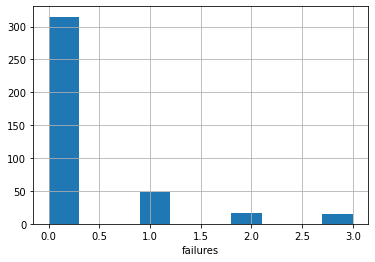

In [168]:
col_info(stud, 'failures')

Теперь в выборке отсутствуют пробелы.

### 16. Рассмотрим атрибут schoolsup:

no     335
yes     51
Name: schoolsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 9


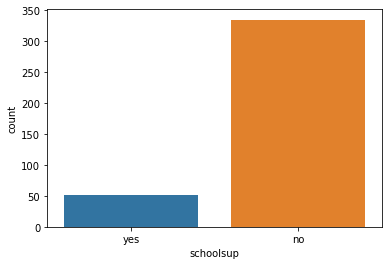

In [169]:
col_info(stud, 'schoolsup')

Из графика видно что у подавляющего большинства отсутствуют дополнительная образовательная поддержка. Этим значением можно закрыть пробелы

In [170]:
stud.schoolsup = stud.schoolsup.apply(lambda x: 'no' if pd.isnull(x) else x)

no     344
yes     51
Name: schoolsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


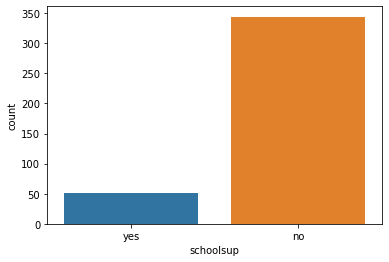

In [171]:
col_info(stud, 'schoolsup')

Теперь в выборке отсутствуют пробелы.

### 17. Рассмотрим атрибут famsup:

yes    219
no     137
Name: famsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 39


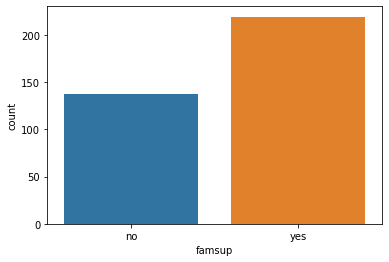

In [172]:
col_info(stud, 'famsup')

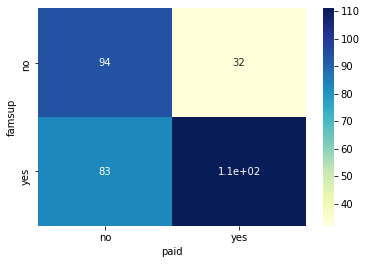

In [173]:
sns.heatmap(pd.crosstab(stud['famsup'], stud['paid']), annot = True, cmap = "YlGnBu")

In [174]:
stud.loc[(stud['famsup'].isnull())&(stud['paid']=='no'), 'famsup'] = random.choice(['yes', 'no'])
stud.loc[(stud['famsup'].isnull())&(stud['paid']=='yes'), 'famsup'] = 'yes'
stud.loc[(stud['famsup'].isnull())&(stud['paid'].isnull()), 'famsup'] = random.choice(['yes', 'no'])

yes    258
no     137
Name: famsup, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


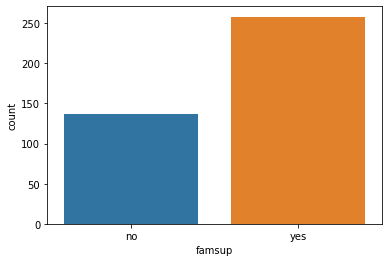

In [175]:
col_info(stud, 'famsup')

### 18. Рассмотрим атрибут paid:

no     200
yes    155
Name: paid, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 40


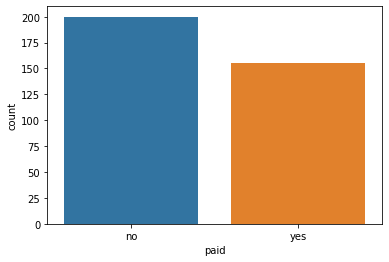

In [176]:
col_info(stud, 'paid')

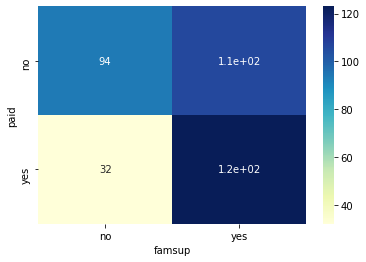

In [177]:
sns.heatmap(pd.crosstab(stud['paid'], stud['famsup']), annot = True, cmap = "YlGnBu")

In [178]:
stud.loc[(stud['paid'].isnull())&(stud['famsup']=='yes'), 'paid'] = random.choice(['yes', 'no'])
stud.loc[(stud['paid'].isnull())&(stud['famsup']=='no'), 'paid'] = 'no'

no     211
yes    184
Name: paid, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


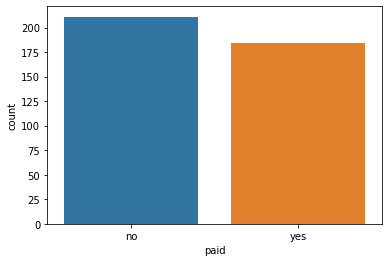

In [179]:
col_info(stud, 'paid')

### 19. Рассмотрим атрибут activities:

yes    195
no     186
Name: activities, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 14


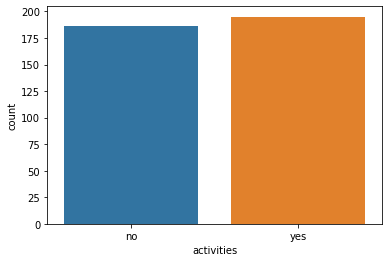

In [180]:
col_info(stud, 'activities')

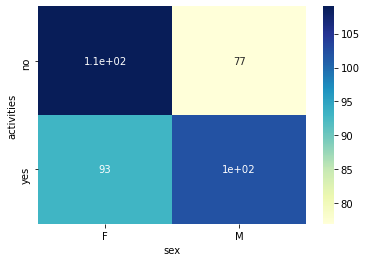

In [181]:
sns.heatmap(pd.crosstab(stud['activities'], stud['sex']), annot = True, cmap = "YlGnBu")

Распределение значений для activities меняется в зависимости от пола. Если F то no, если M то yes. 

yes    203
no     192
Name: activities, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


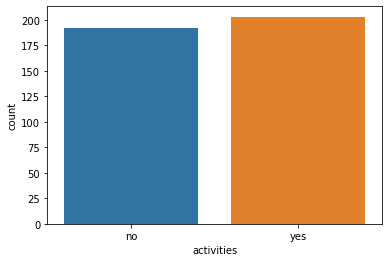

In [182]:
stud.loc[(stud['activities'].isnull())&(stud['sex']=='F'), 'activities'] = 'no'
stud.loc[(stud['activities'].isnull())&(stud['sex']=='M'), 'activities'] = 'yes'
col_info(stud, 'activities')

### 20. Рассмотрим атрибут nursery:

yes    300
no      79
Name: nursery, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 16


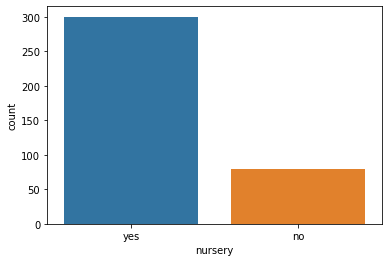

In [183]:
col_info(stud, 'nursery')

Большая часть учеников посещала детский сад. Пробелы можно заполнить значением yes

In [184]:
stud.nursery = stud.nursery.apply(lambda x: 'yes' if pd.isnull(x) else x)

yes    316
no      79
Name: nursery, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


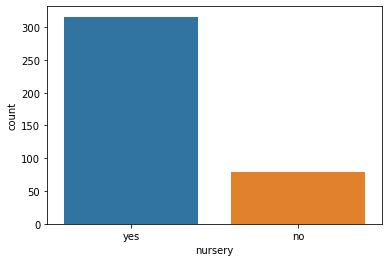

In [185]:
col_info(stud, 'nursery')

### 21. Рассмотрим атрибут studytime, granular:

Переименуем столбец "studytime, granular" в "studytime_granular"

-6.0     194
-3.0     103
-9.0      64
-12.0     27
 NaN       7
Name: studytime_granular, dtype: int64


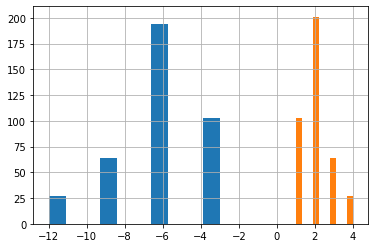

In [186]:
stud = stud.rename(columns={'studytime, granular' : 'studytime_granular'})
print(stud.studytime_granular.value_counts(dropna=False))
stud.studytime_granular.hist()
stud.studytime.hist()

Атрибут зеркально копирует значения в атрибуте studytime, его имеет смысл удалить

In [187]:
del stud['studytime_granular']

In [188]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

Атрибут удален

### 22. Рассмотрим атрибут higher:

yes    356
no      19
Name: higher, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 20


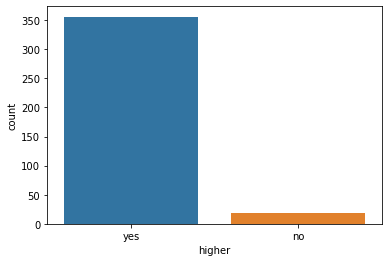

In [189]:
col_info(stud, 'higher')

Подавляющее большинство учеников хочет получить высшее образование. Пустые значения могут быть заполнены значением yes

In [190]:
stud.higher = stud.higher.apply(lambda x: 'yes' if pd.isnull(x) else x)

yes    376
no      19
Name: higher, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


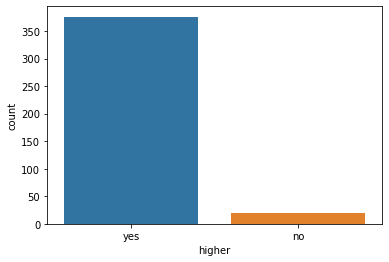

In [191]:
col_info(stud, 'higher')

### 23. Рассмотрим атрибут internet:

yes    305
no      56
Name: internet, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 34


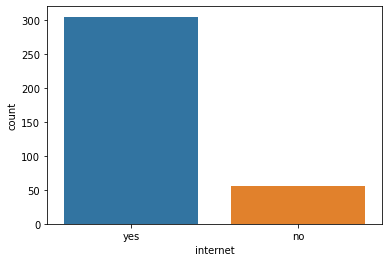

In [192]:
col_info(stud, 'internet')

Подавляющее большинство учеников имеет дома интернет. Пустые значения могут быть заполнены значением yes

In [193]:
stud.internet = stud.internet.apply(lambda x: 'yes' if pd.isnull(x) else x)

yes    339
no      56
Name: internet, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


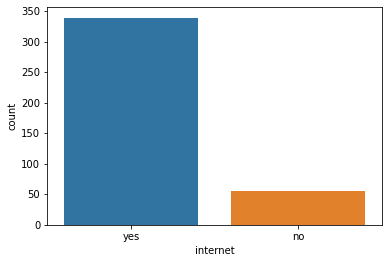

In [194]:
col_info(stud, 'internet')

### 24. Рассмотрим атрибут romantic:

no     240
yes    124
Name: romantic, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 31


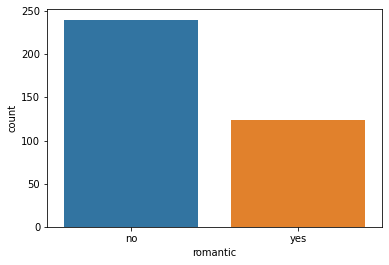

In [195]:
col_info(stud, 'romantic')

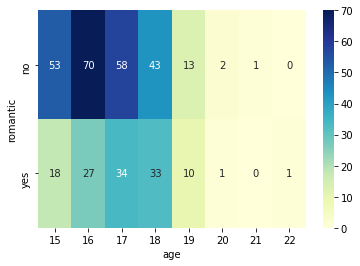

In [196]:
sns.heatmap(pd.crosstab(stud['romantic'], stud['age']), annot = True, cmap = "YlGnBu")

Мода:  0    15
dtype: int64
Медиана:  16.0
Среднее 16.322580645161292
Пропущеных значений в столбце: 0


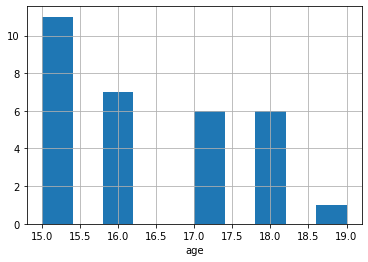

In [197]:
col_info(stud[stud.romantic.isnull()], 'age')

In [198]:
stud.loc[(stud['romantic'].isnull())&(stud['age']== 15), 'romantic'] = 'no'
stud.loc[(stud['romantic'].isnull())&(stud['age']== 16), 'romantic'] = 'no'
stud.loc[(stud['romantic'].isnull())&(stud['age']== 17), 'romantic'] = random.choices(['no', 'yes'], weights=[58, 34])
stud.loc[(stud['romantic'].isnull())&(stud['age']== 18), 'romantic'] = random.choice(['no', 'yes'])
stud.loc[(stud['romantic'].isnull())&(stud['age']== 19), 'romantic'] = random.choice(['no', 'yes'])

no     270
yes    125
Name: romantic, dtype: int64
Уникальных значений: 2
Пропущеных значений в столбце: 0


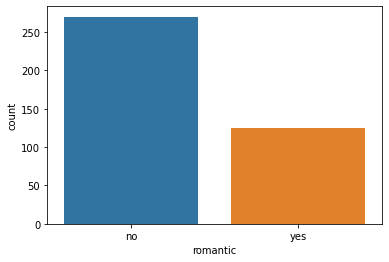

In [199]:
col_info(stud, 'romantic')

### 25. Рассмотрим атрибут famrel:

Мода:  0    4.0
dtype: float64
Медиана:  4.0
Среднее 3.9375
Пропущеных значений в столбце: 27


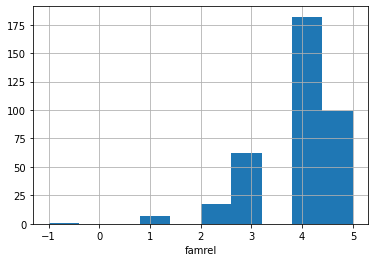

In [200]:
col_info(stud, 'famrel')

Значение - 1 является ошибкой, поменяем его на 1.0

In [201]:
stud.famrel = stud.famrel.apply(lambda x: None if pd.isnull(x) else abs(x))

Возьмем 3 самых больших значения и сделаем случайную выборку с весами 

In [202]:
stud.loc[stud['famrel'].isnull(), 'famrel'] = random.choices([4.0, 5.0, 3.0], weights=[182, 99, 62])

Мода:  0    4.0
dtype: float64
Медиана:  4.0
Среднее 3.8784810126582276
Пропущеных значений в столбце: 0


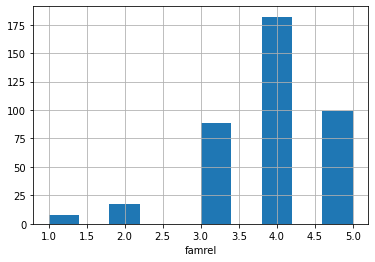

In [203]:
col_info(stud, 'famrel')

### 26. Рассмотрим атрибут freetime:

Мода:  0    3.0
dtype: float64
Медиана:  3.0
Среднее 3.2317708333333335
Пропущеных значений в столбце: 11


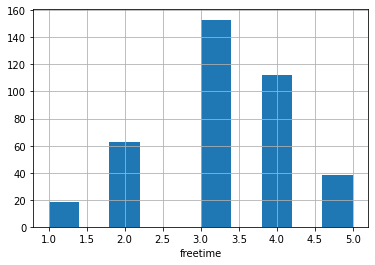

In [204]:
col_info(stud, 'freetime')

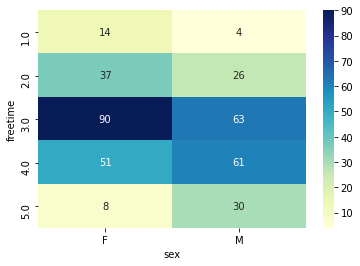

In [205]:
sns.heatmap(pd.crosstab(stud['freetime'], stud['sex']), annot = True, cmap = "YlGnBu")

Мода:  0    3.0
dtype: float64
Медиана:  3.0
Среднее 3.2253164556962024
Пропущеных значений в столбце: 0


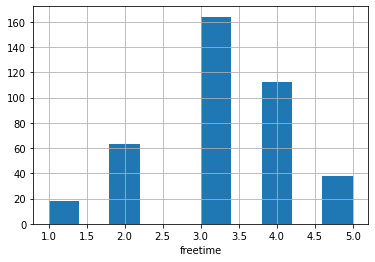

In [206]:
stud.loc[(stud['freetime'].isnull())&(stud['sex']=='F'), 'freetime'] = 3
stud.loc[(stud['freetime'].isnull())&(stud['sex']=='M'), 'freetime'] = random.choice([4, 3])
col_info(stud, 'freetime')

### 27. Рассмотрим атрибут goout:

Мода:  0    3.0
dtype: float64
Медиана:  3.0
Среднее 3.1059431524547803
Пропущеных значений в столбце: 8


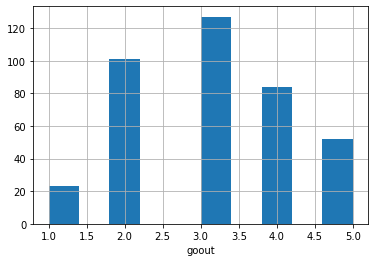

In [207]:
col_info(stud, 'goout')

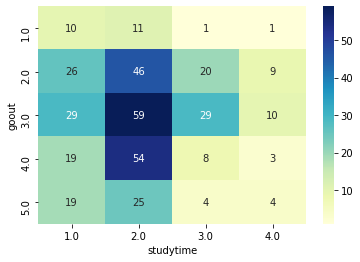

In [208]:
sns.heatmap(pd.crosstab(stud['goout'], stud['studytime']), annot = True, cmap = "YlGnBu")

Мода:  0    2.0
dtype: float64
Медиана:  2.0
Среднее 2.25
Пропущеных значений в столбце: 0


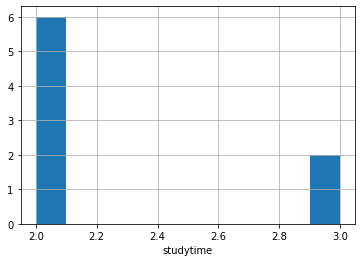

In [209]:
col_info(stud[stud.goout.isnull()], 'studytime')

Мода:  0    3.0
dtype: float64
Медиана:  3.0
Среднее 3.118987341772152
Пропущеных значений в столбце: 0


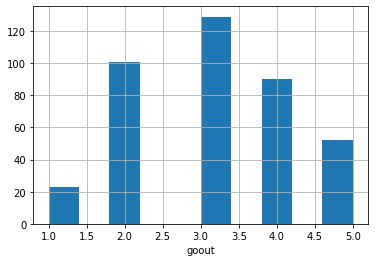

In [210]:
stud.loc[(stud['goout'].isnull())&(stud['studytime']== 2), 'goout'] = random.choices([2, 3, 4], weights=[46, 58, 53])
stud.loc[(stud['goout'].isnull())&(stud['studytime']== 3), 'goout'] = random.choice([2, 3])
col_info(stud, 'goout')

### 28. Рассмотрим атрибут health:

Мода:  0    5.0
dtype: float64
Медиана:  4.0
Среднее 3.531578947368421
Пропущеных значений в столбце: 15


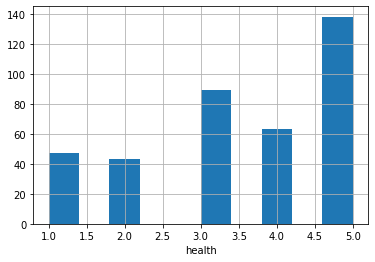

In [211]:
col_info(stud, 'health')

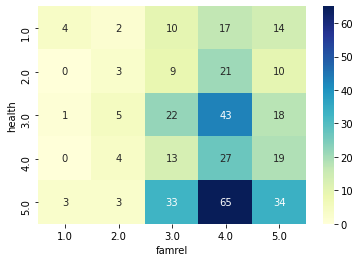

In [212]:
sns.heatmap(pd.crosstab(stud['health'], stud['famrel']), annot = True, cmap = "YlGnBu")

Мода:  0    4.0
dtype: float64
Медиана:  4.0
Среднее 4.133333333333334
Пропущеных значений в столбце: 0


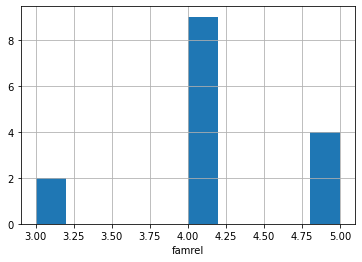

In [213]:
col_info(stud[stud.health.isnull()], 'famrel')

Мода:  0    5.0
dtype: float64
Медиана:  4.0
Среднее 3.5873417721518988
Пропущеных значений в столбце: 0


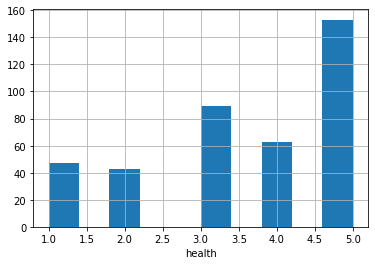

In [214]:
stud.loc[(stud['health'].isnull())&(stud['famrel']== 4), 'health'] = 5
stud.loc[(stud['health'].isnull())&(stud['famrel']== 5), 'health'] = random.choices([5, 4, 3], weights=[34, 19, 18])
stud.loc[(stud['health'].isnull())&(stud['famrel']== 3), 'health'] = random.choice([3, 5])
col_info(stud, 'health')

### 29. Рассмотрим атрибут absences:

Мода:  0    0.0
dtype: float64
Медиана:  4.0
Среднее 7.2793733681462145
Пропущеных значений в столбце: 12


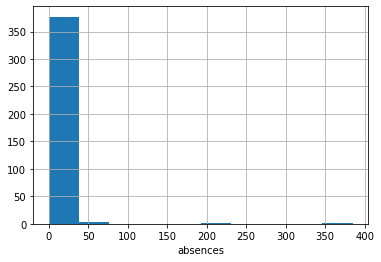

In [215]:
col_info(stud, 'absences')

Мода:  0    0.0
dtype: float64
Медиана:  4.0
Среднее 7.058227848101266
Пропущеных значений в столбце: 0


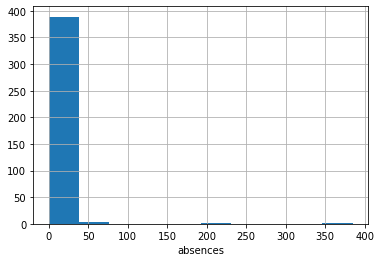

In [216]:
stud.absences = stud.absences.apply(lambda x : 0 if pd.isnull(x) else x)
col_info(stud, 'absences')

### 30. Рассмотрим атрибут score:

Мода:  0    50.0
dtype: float64
Медиана:  55.0
Среднее 52.26221079691517
Пропущеных значений в столбце: 6


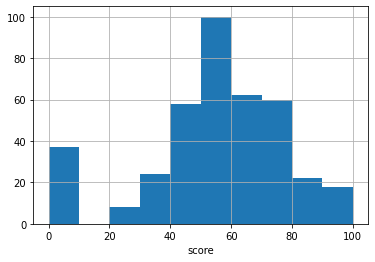

In [217]:
col_info(stud, 'score')

Удалим пустые значения, т.к. мы не может достоверно их заполнить

In [218]:
stud = stud.drop(stud[stud.score.isnull()].index)

На графике видно что значения 0 - это те, кто не пришел на экзамен. Потенциальные выбросы

Мода:  0    50.0
dtype: float64
Медиана:  55.0
Среднее 57.75568181818182
Пропущеных значений в столбце: 0


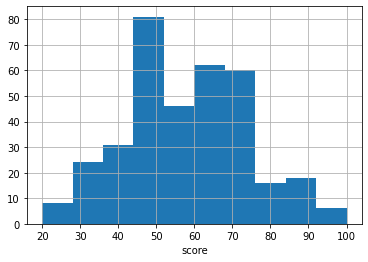

In [219]:
col_info(stud[stud['score'] > 0], 'score')

In [220]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

В выборке осталось 389 записей. Пробелы отсутствуют.

# Корреляционный  анализ данных:

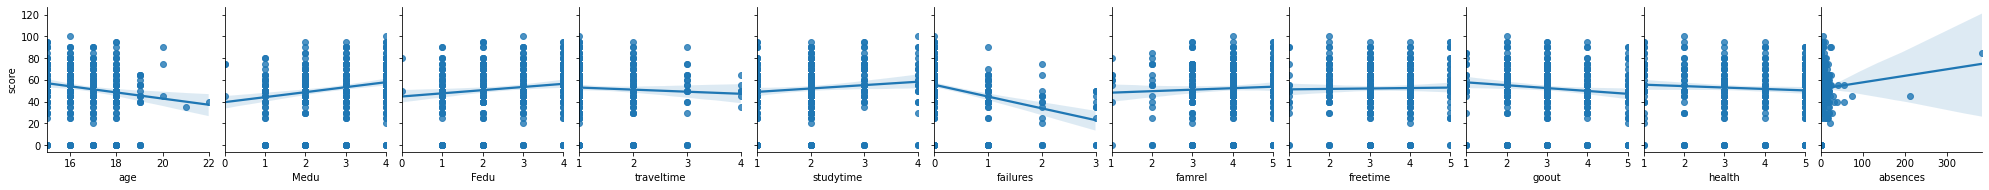

In [221]:
sns.pairplot(
             stud, 
             kind = 'reg',
             x_vars = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences'],
             y_vars = ['score']
)

Из графиков видно:
1. Заметно ухудшение оценок с возрастом.
2. Заметен небольшой тренд на улучшение оценок с высоким образованием родителей.
3. Время на учёбу помимо школы так же лучше сказывается на оценку
4. Количество внеучебных неудач влияет на низкую оценку
5. Небольшое влияние на оценку оказывают плохие взаимоотношения в семье
6. Длительные прогулки с друзьями так же оказывают небольшое влияние на снижение оценки

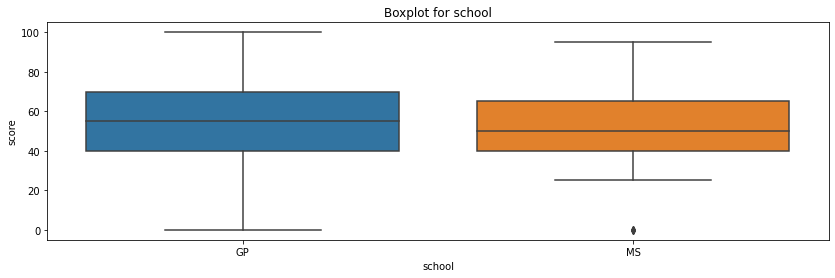

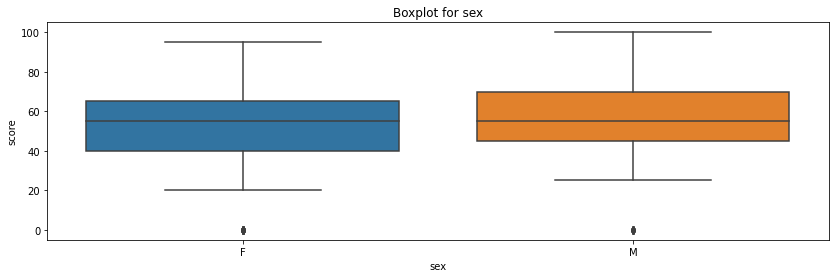

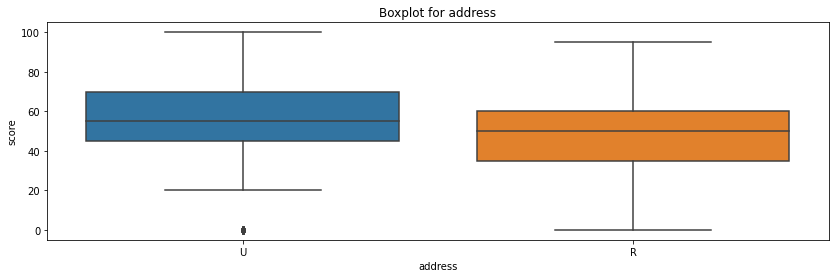

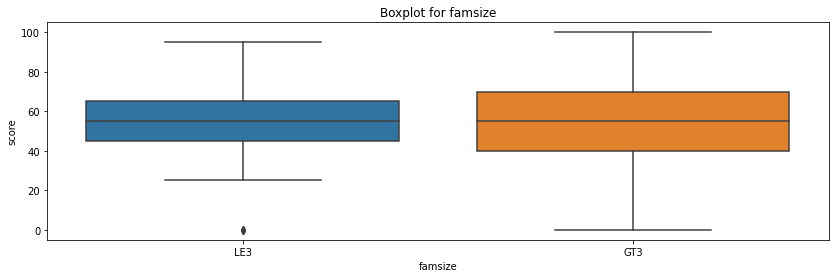

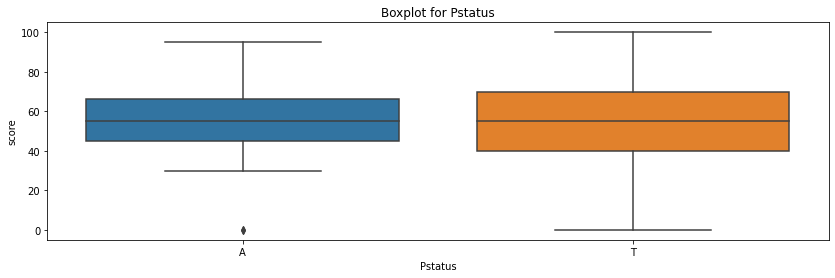

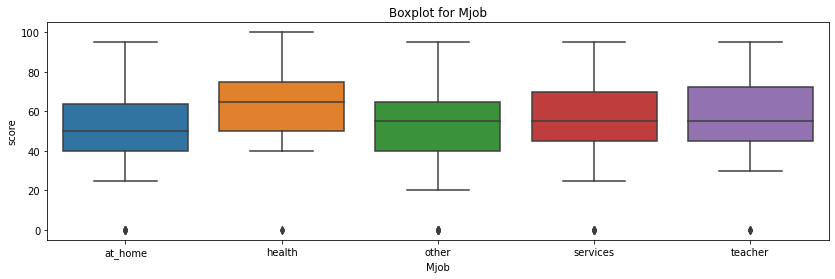

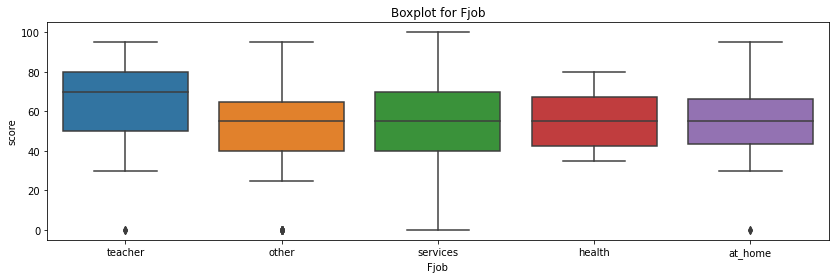

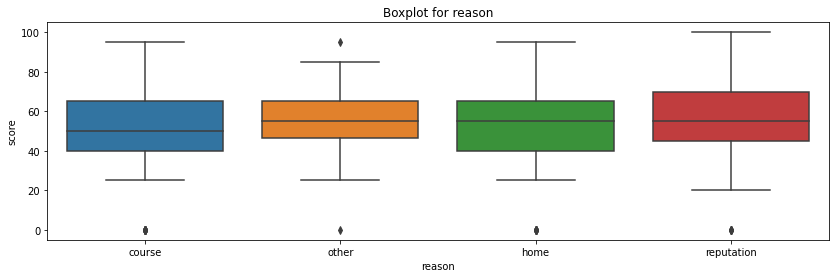

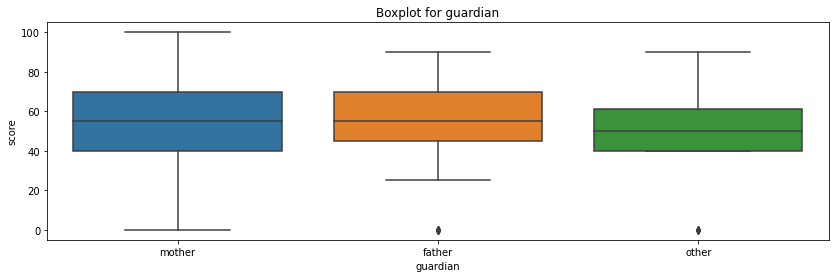

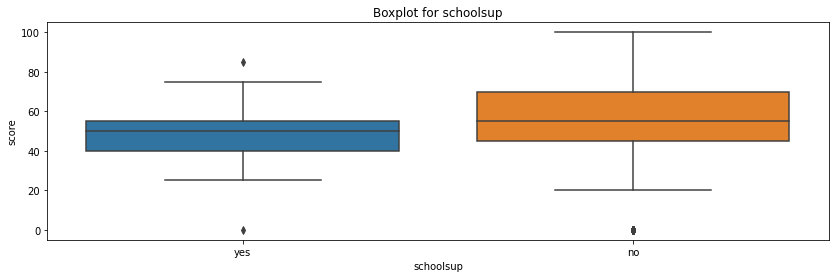

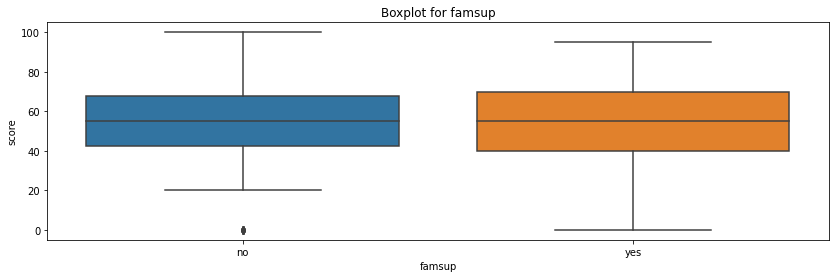

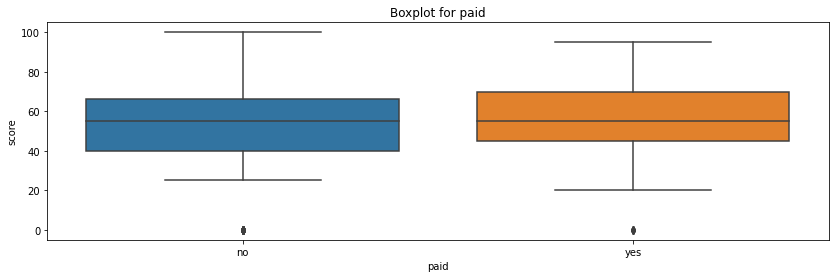

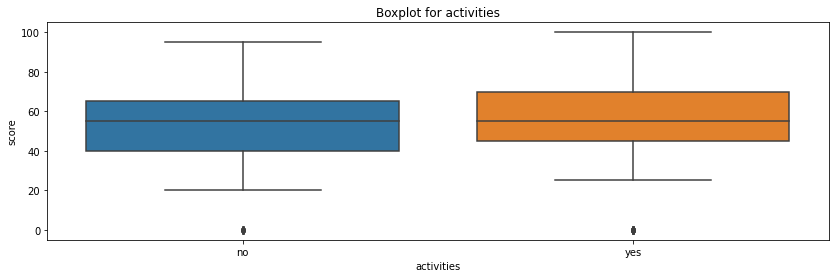

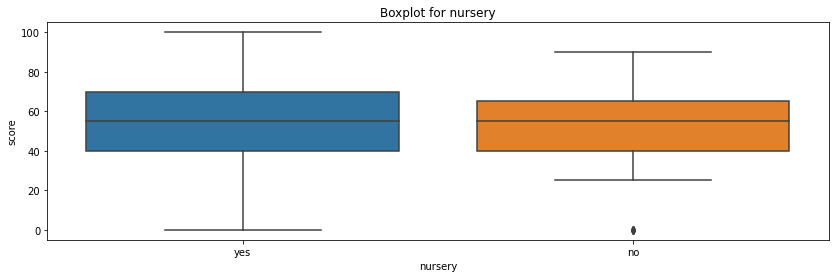

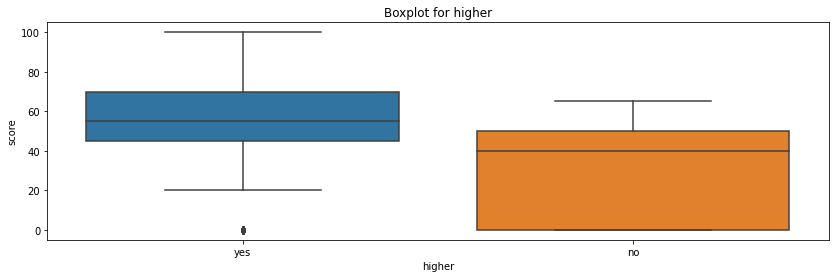

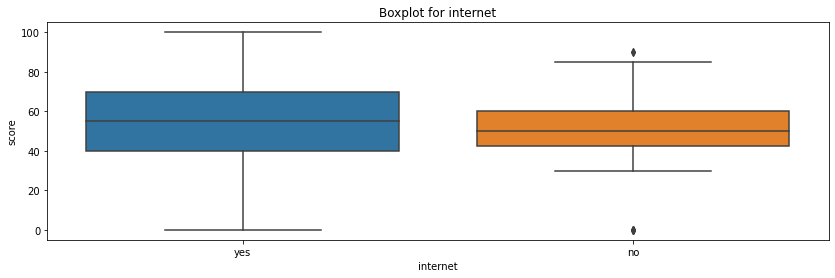

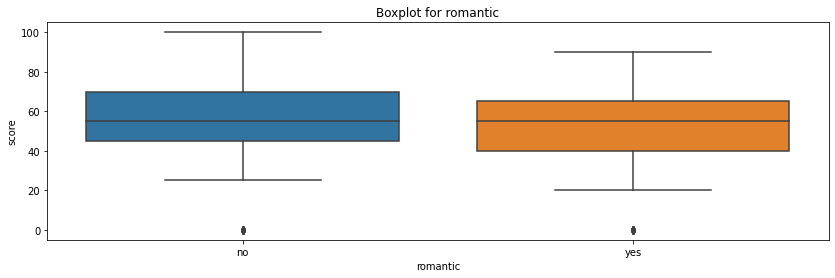

In [222]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

# Тест Стьюдента:

In [223]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются следующие параметры: address, Mjob, paid, higher, romantic

# Итог:

Важные переменные, которые, возможно, оказывают влияние на оценку, это:
- age
- Medu
- Fedu
- studytime
- failures
- famrel
- goout
- address
- Mjob
- paid
- higher
- romantic

In [224]:
stud_for_model = stud.loc[:, ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'goout', 'address', 'Mjob', 'paid', 'higher', 'romantic']]
stud_for_model.head(10)

,age,Medu,Fedu,studytime,failures,famrel,goout,address,Mjob,paid,higher,romantic
0,18,4.0,4.0,2.0,0.0,4.0,4.0,U,at_home,no,yes,no
1,17,1.0,1.0,2.0,0.0,5.0,3.0,U,at_home,no,yes,no
2,15,1.0,1.0,2.0,3.0,4.0,2.0,U,at_home,no,yes,no
3,15,4.0,2.0,3.0,0.0,3.0,2.0,U,health,yes,yes,yes
4,16,3.0,3.0,2.0,0.0,4.0,2.0,U,other,yes,yes,no
5,16,4.0,3.0,2.0,0.0,5.0,2.0,U,services,yes,yes,no
6,16,2.0,2.0,2.0,0.0,4.0,4.0,U,other,no,yes,no
7,17,4.0,4.0,2.0,0.0,4.0,4.0,U,other,no,yes,no
8,15,3.0,2.0,2.0,0.0,3.0,2.0,U,services,yes,yes,no
9,15,3.0,4.0,2.0,0.0,5.0,1.0,U,other,yes,yes,no
